## Урок 6. Домашнее задание

### 6.1 Задание начального уровня

**Задание просто уровня** Дана матрица $A$, вычислите SVD разложение с помощью функции `numpy.linalg.svd`. Найдите [определитель](https://ru.wikipedia.org/wiki/Определитель ) матрицы $U$ с помощью функции `numpy.linalg.det`. Чему равен определитель?

In [3]:
import numpy as np
from numpy.linalg import svd, det

A = np.array([[3,2,2],[2,3,-2]])

# -- ВАШ КОД ТУТ --
U, S,Vt = svd(A)


In [4]:
print("U =\n", U)
print("\nS =", S)
print("\nV^T =\n", Vt)

U =
 [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

S = [5. 3.]

V^T =
 [[-7.07106781e-01 -7.07106781e-01 -5.55111512e-17]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


In [5]:
d = det(U)
print("Определитель матрицы U =", d)


Определитель матрицы U = -1.0000000000000004


### 6.2 Задание высокого уровня

В домашней работе предлагаю Вам немного поработать с изображениями (похожий трюк можно увидеть в этой [статье на хабре](https://habr.com/ru/post/275273/)). Для этого нужно установить модуль Pillow (если у вас Анаконда, то https://anaconda.org/anaconda/pillow)

<pre>
pip install Pillow
</pre>

Загрузим картинку в трёхмерный *numpy array* и отобразим её прямо в jupyter notebook.

<class 'numpy.ndarray'> (380, 509, 3)


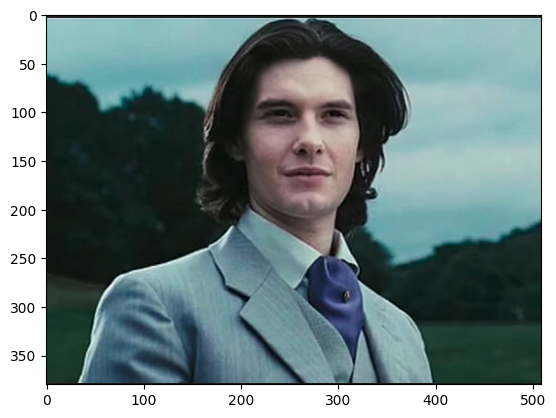

In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
img = mpimg.imread('/Users/mikhail/Data Science Projects/Data Scientist/1. ML. Начальный уровень/08/dorian_grey.png')
print(type(img),img.shape)
imshow(img)
plt.show()

У нас трёхмерный массив, где третье измерение соответствует цветовой компоненте rgb. Цветную картинку можно преобразовать в двумерную серую (grayscale) с помощью формулы, которую я нашёл [тут](https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python)

<class 'numpy.ndarray'> (380, 509)


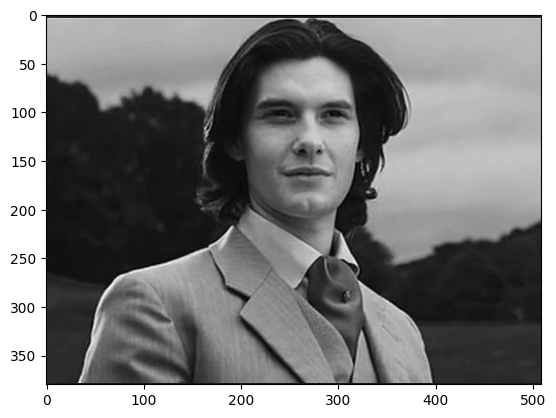

In [9]:
def rgb2gray(rgb):
  ''' Берётся среднее трёх цветов RGB'''
  tile = np.tile(np.c_[0.333, 0.333, 0.333], reps=(rgb.shape[0],rgb.shape[1],1))
  return np.sum(tile * rgb, axis=2)

img_gray = rgb2gray(img)
print(type(img_gray), img_gray.shape)
imshow(img_gray, cmap = "gray")
plt.show()

Далее

* обучите на массиве *img_gray* размерности $894 \times 588$ класс TruncatedSVD c параметром n_components=5
* получите матрицу *img_gray_svd* с помощью функции `transform`
* получите массив *img_gray_svd_restored* с помощью функции `inverse_transform`
* визуализируйте массив *img_gray_svd_restored* с помощью функции *imshow*

Этот алгоритм демонстрирует, как происходит сжатие данных большой размерности. А результате у вас должна получится фотка как бы в очень нечётком виде

![grey_pca.png](https://248006.selcdn.ru/public/DS.%20Block%202.%20M8/grey_pca.png)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import TruncatedSVD

In [11]:
svd = TruncatedSVD(n_components=5)
img_gray_svd = svd.fit_transform(img_gray)

In [12]:
img_gray_svd_restored = svd.inverse_transform(img_gray_svd)
print("Исходная форма:", img_gray.shape)
print("После сжатия:", img_gray_svd.shape)
print("После восстановления:", img_gray_svd_restored.shape)

Исходная форма: (380, 509)
После сжатия: (380, 5)
После восстановления: (380, 509)


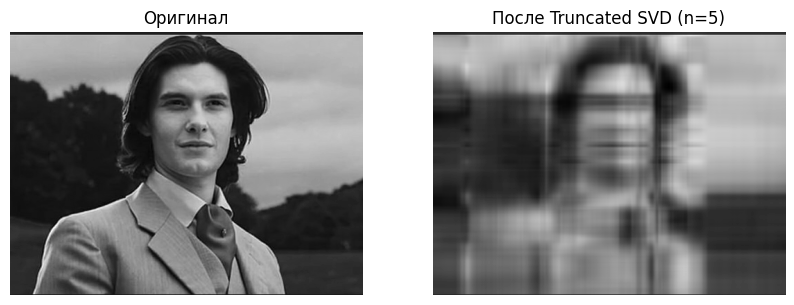

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Оригинал")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_gray_svd_restored, cmap='gray')
plt.title("После Truncated SVD (n=5)")
plt.axis('off')

plt.show()

В этом уроке мы познакомились с таким способом снижения размерности, как PCA. Оба метода которые мы же значем выполняют сжатие как линейное преобразование. В следующем уроке рассмотрим нелинейное сжатие